In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import imageio
import moviepy.editor as mp
from matplotlib.animation import FuncAnimation
import time as time

In [2]:
# constants
G = 6.67e-11 # gravitational constant
Au = 1.49e11 # astronaumical unit
me = 5e24 # mass of earth
c = G * me / Au**2

In [3]:
def get_acc(pos,m,t,s):    
    N = pos.shape[0]
    a = np.zeros((N,3))
    x = pos[:,0:1,t] # column
    y = pos[:,1:2,t]
    z = pos[:,2:3,t]
    dx = x.T - x # NxN matrix 
    dy = y.T - y 
    dz = z.T - z
    invr3 = (dx**2 + dy**2 + dz**2 + s**2)**(-1.5)
    invr3[invr3>0] = invr3[invr3>0] # take out diagnol 
    a[:,0:1] = c * (dx * invr3) @ m
    a[:,1:2] = c * (dy * invr3) @ m
    a[:,2:3] = c * (dz * invr3) @ m
    return a

def get_tan_vel(x, y, vel_magnitude): # set tangential velocities
    # Calculate the magnitude of the position vector
    r = np.sqrt(x**2 + y**2)
    # Calculate the tangent vector components
    tangent_x = -y / r
    tangent_y = x / r
    # Set the initial velocities along the tangent direction
    vel_x = vel_magnitude * tangent_x
    vel_y = vel_magnitude * tangent_y
    return vel_x, vel_y

In [4]:
# define constants
s = 6378e3/Au # softening
T = 10 # total time step
dt = 0.01
Nt = int(np.ceil(T/dt)) 
N = 3000 # total number of particles
m = 150.0*np.ones((N,1))/N
pos = np.zeros((N,3,Nt)) # position
vel = np.zeros((N,3)) # velocity

In [5]:
# initia condition; randomized position
pos[:,0,0] = np.random.uniform(-5, 5, N)
pos[:,1,0] = np.random.uniform(-5, 5, N)
pos[:,2,0] = np.random.uniform(-1, 1,N)

# set initial velocities
vel_magnitude = 2
vel_x, vel_y = get_tan_vel(pos[:,0,0], pos[:,1,0], vel_magnitude)
vel[:, 0] = vel_x
vel[:, 1] = vel_y
vel[:,2] = np.random.uniform(0, 0.5, N)

In [6]:
time_i = time.time()
acc = get_acc(pos,m,0,s)
for i in range(1, Nt):
    vel += (acc * dt/2)/c
    pos[:,:,i] = pos[:,:,i-1] + vel * dt
    acc = get_acc(pos,m,i,s)
    vel += (acc * dt/2)/c
    print(str("{:.2f}".format(100 * i / Nt)) + "%" + " " + "done", end='\r')
duration = time.time() - time_i
print(str(duration)+' '+'secs')

KeyboardInterrupt: 

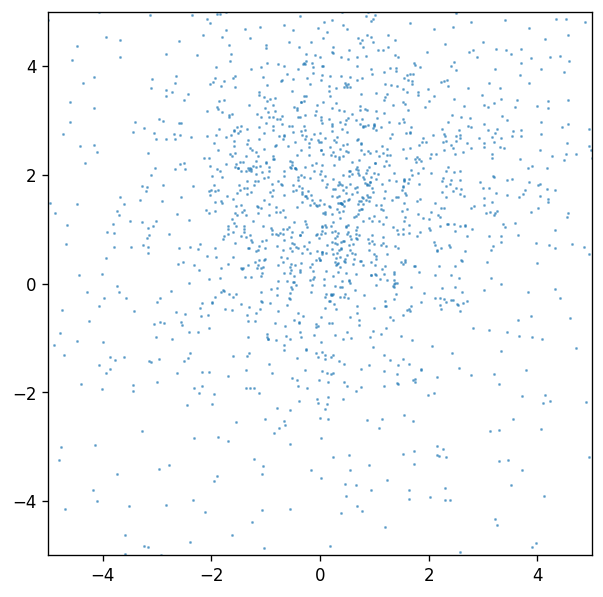

In [388]:
def update_frame(t):
    ax.clear()
    ax.set_aspect('equal')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    ax.plot(pos[:, 0, t], pos[:, 1, t], 'o', alpha=0.5, markersize=0.8)

dpi = 120
fig_width, fig_height = 6, 6
fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=dpi)
writer = imageio.get_writer("model.gif", mode='I', duration=1/30)
animation = FuncAnimation(fig, update_frame, frames=Nt, repeat=False)
for t in range(Nt):
    update_frame(t)  # Update the frame
    fig.canvas.draw()  # Draw the updated figure
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    writer.append_data(image)
    print(str("{:.2f}".format(100*t/Nt))+"%"+" "+"done", end='\r')
writer.close()